Con el método del codo y el método de la silueta sacamos el numero de clusters óptimo

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


C:\Users\Jose\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jose\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jose\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jose\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

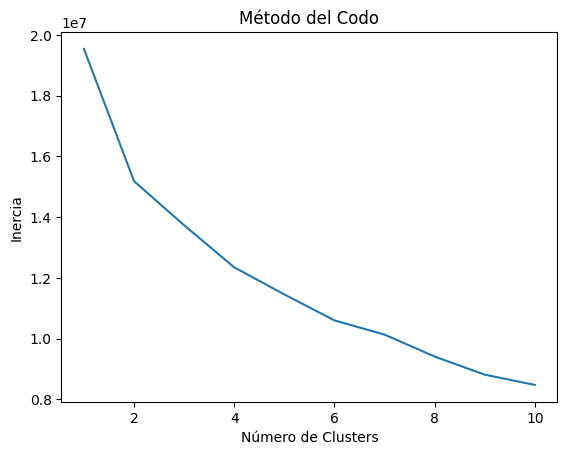

In [9]:
# Leer archivo limpio
df = pd.read_csv("archivo_limpio.csv")

# Escalar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Realizar clustering con diferentes valores de K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Graficar la inercia versus K
plt.plot(range(1, 11), inertia)
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()


c:\Users\kenic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kenic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kenic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kenic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

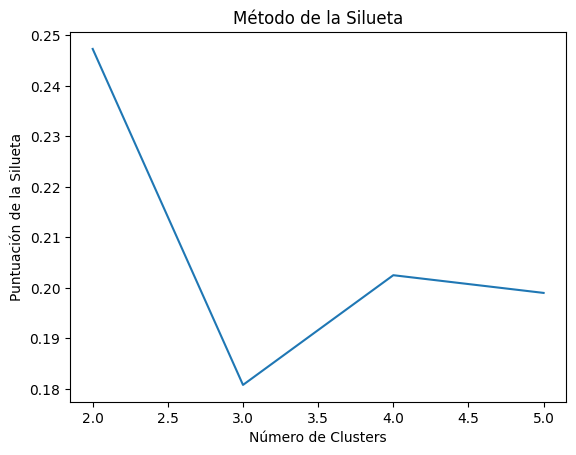

El número óptimo de clusters es: 2


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Leer archivo limpio
df = pd.read_csv("archivo_limpio.csv")

# Escalar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Realizar clustering con diferentes valores de K
silhouette_scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Encontrar el valor óptimo de K
optimal_k = np.argmax(silhouette_scores) + 2

# Graficar la puntuación de la silueta versus K
plt.plot(range(2, 6), silhouette_scores)
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de la Silueta')
plt.title('Método de la Silueta')
plt.show()

print("El número óptimo de clusters es:", optimal_k)



c:\Users\kenic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


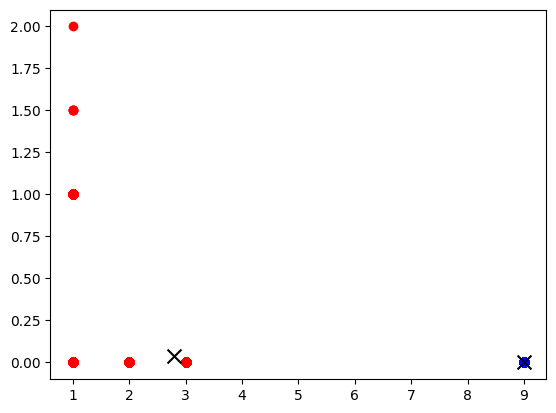

In [2]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Cargar los datos desde el archivo CSV
data = pd.read_csv("archivo_limpio.csv")

# Crear la nueva columna con los datos promediados de NUPHON y NUPMUJ
data["promedio"] = (data["NUPHON"] + data["NUPMUJ"]) / 2

# Seleccionar una muestra aleatoria de 1000 filas de las columnas "CLAUNI" y "promedio"
sample = data[["CLAUNI", "promedio"]].sample(n=10000)

# Convertir la muestra en un array de NumPy
X = sample.values

# Crear un modelo de clustering con K-Means
kmeans = KMeans(n_clusters=2)

# Ajustar el modelo a los datos
kmeans.fit(X)

# Obtener las etiquetas de cluster para cada punto de datos
labels = kmeans.predict(X)

# Obtener las coordenadas de los centroides de cada cluster
centroids = kmeans.cluster_centers_

# Graficar los puntos de datos y los centroides de cada cluster
colors = ["r", "b"]
for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], color=colors[labels[i]])
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", color="k", s=100)
plt.show()

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('archivo_limpio.csv')

X = df[['CLAUNI', 'NUPHON', 'NUPMUJ']]

# Aplicar k-means
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)


C:\Users\Jose\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


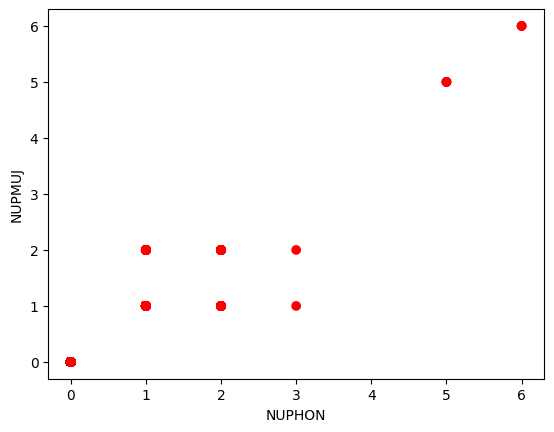

In [17]:
# Graficar los resultados
colors = np.array(['red', 'blue'])
plt.scatter(X['NUPHON'], X['NUPMUJ'], c=colors[y_kmeans])
plt.xlabel('NUPHON')
plt.ylabel('NUPMUJ')
plt.show()


